In [1]:
from miran import *
import librosa
import scipy

In [1]:
#nnlss= folderfiles('/Users/angel/Insync/Datasets/giantsteps/splits/nnlsbt')

%matplotlib inline
from miran import *
import librosa
import librosa.display as ld
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

sns.set_style('ticks', {'axes.linewidth': 0.2,  'axes.edgecolor': 'black',})
sns.set_palette("Reds_r"); my_palette='Reds'; libcolor='Reds'
mpl.rc('font', **{'family':'serif', 'serif':['Times']})
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('axes', labelsize=9)
mpl.rc('text', usetex=True)
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 0.3
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 0.3

In [5]:
def chroma_info(nnls_file, keyfolder='/Users/angel/Insync/Datasets/giantsteps/keys'):
    fn = strip_filename(nnls_file)
    print(fn)
    key = os.path.join(keyfolder, fn[:fn.rfind(' - ')] + '.key')
    with open(key, 'r') as key:
        key = key.readline()
    print key
    chroma = csv_to_numpy2(nnls_file)
    plot_bchroma(chroma, save=False)
    return chroma

def split_chromagram(chromagram):

    if chromagram.shape[0] != 24:
        chromagram = chromagram.T
        if chromagram.shape[0] != 24:
            print('does not look like a compound chromagram')
            return

    bass = chromagram[:12].T
    bass = np.roll(bass, -3)

    treble = chromagram[12:].T
    treble = np.roll(treble, -3)
    
    return bass, treble


In [6]:
def plot_bchroma(chromagram, name="untitled", sr=44100, hl=2048,
                output_dir="/Users/angel/Dropbox/Apps/Texpad/Thesis/figures", save=True, cmap='magma'):

    from librosa.display import specshow
    with sns.axes_style('ticks'):
        if chromagram.shape[0] != 24:
            chromagram = chromagram.T
            if chromagram.shape[0] != 24:
                print('does not look like a compound chromagram')
                return

        plt.figure(figsize=(5.16, 3), dpi=150)

        bass = chromagram[:12].T
        bass = np.roll(bass, -3)

        treble = chromagram[12:].T
        treble = np.roll(treble, -3)

        plt.subplot(2, 1, 1)
        specshow(treble.T, x_axis='time', sr=sr, hop_length=hl,cmap=cmap)
        plt.yticks((0.5, 2.5, 4.5, 5.5, 7.5, 9.5, 11.5), ('c', 'd', 'e', 'f', 'g', 'a', 'b'))
        plt.xticks([])
        plt.xlabel('')
        plt.ylabel('treble')

        plt.subplot(2, 1, 2)
        specshow(bass.T, x_axis='time', sr=sr, hop_length=hl,cmap=cmap)
        plt.yticks((0.5, 2.5, 4.5, 5.5, 7.5, 9.5, 11.5), ('c', 'd', 'e', 'f', 'g', 'a', 'b'))
        plt.ylabel('bass')
        plt.xlabel('time (secs.)')
        if save:
            plt.savefig(os.path.join(output_dir, name + '.pdf'), format="pdf", dpi=1200)
        plt.show()

In [7]:
plot_bchroma

<function __main__.plot_bchroma>

In [11]:
plot_bchroma(csv_to_numpy('/Users/angel/Insync/Datasets/beatport/nnls/5667823 Wavolizer - The Difference (Original Mix) - 0.nnls'))

does not look like a compound chromagram


In [ ]:
/Users/angel/Insync/Datasets/beatport/nnlsbt/5667823 Wavolizer - The Difference (Original Mix) - 0.nnlsbt

In [4]:
chroma = chroma_info(return_random_track(nnlss))
binchroma = binarize(np.power(chroma,1), 0.2)
plot_bchroma(binchroma, save=False)
b, t = split_chromagram(binchroma)
plt.plot(unit_vector(np.sum(b, axis=0), order=np.inf))
#plt.plot(unit_vector(np.sum(t, axis=0), order=np.inf))

NameError: name 'chroma_info' is not defined

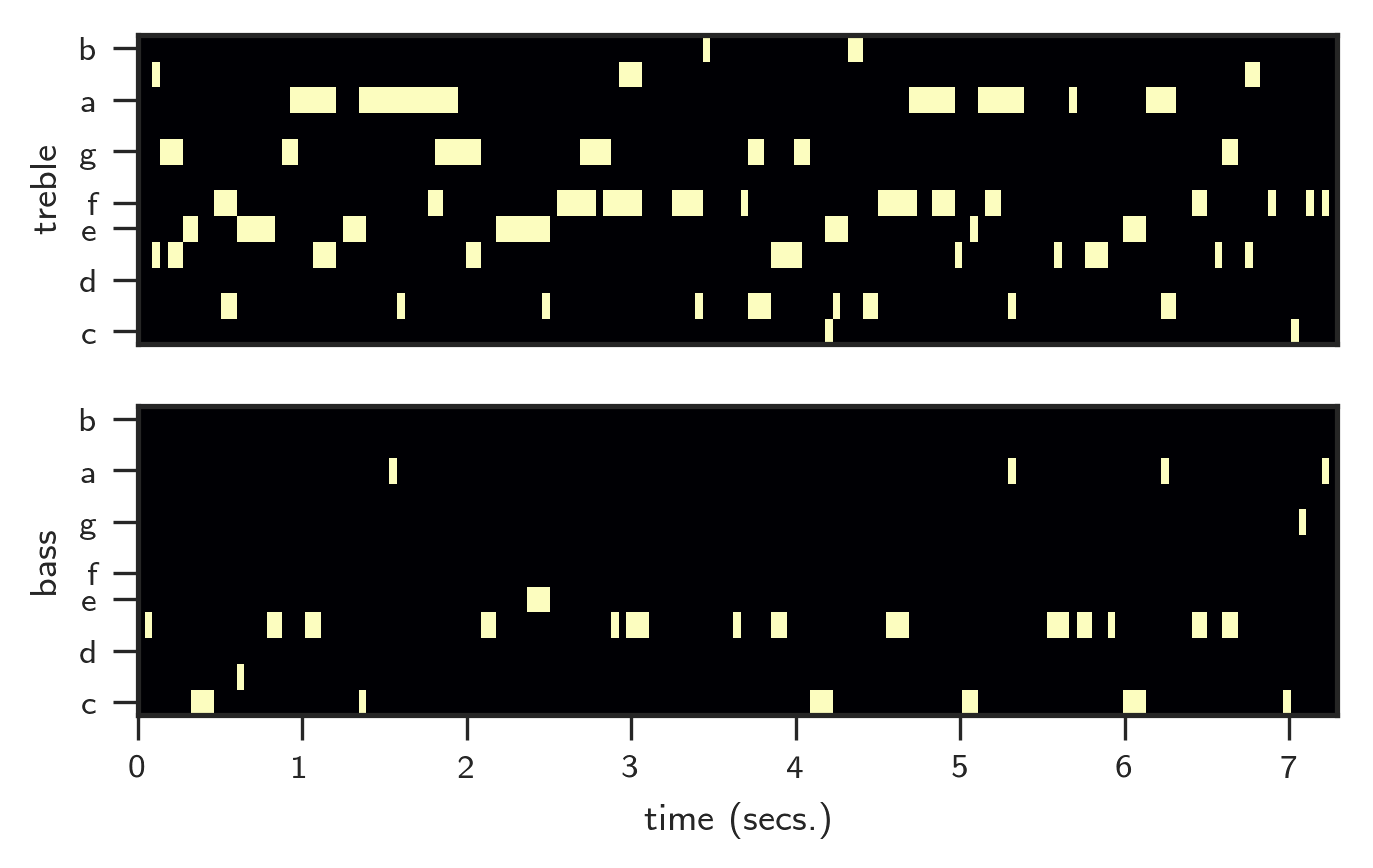

In [90]:
#plot_bchroma(quantile_transform(chroma, n_quantiles=10, random_state=0))
plot_bchroma(binarize(np.power(chroma,2), 0.2))

In [ ]:
# MEDIAN FILTERING IS ONLY NEEDED IF WE WANT A TEMPORAL SCOPE!
# WE DON'T NEED IT IF WE ARE AVERAGING EACH HYPERMEASURE!
chromam = scipy.ndimage.median_filter(chroma, size=(1, 100))

In [ ]:
# NEAREST NEIGHBOUR DECOMPOSITION. VALORA SI NOS COMPENSA!
chroma = np.minimum(chroma.T, librosa.decompose.nn_filter(chroma.T, aggregate=np.median, metric='cosine'))

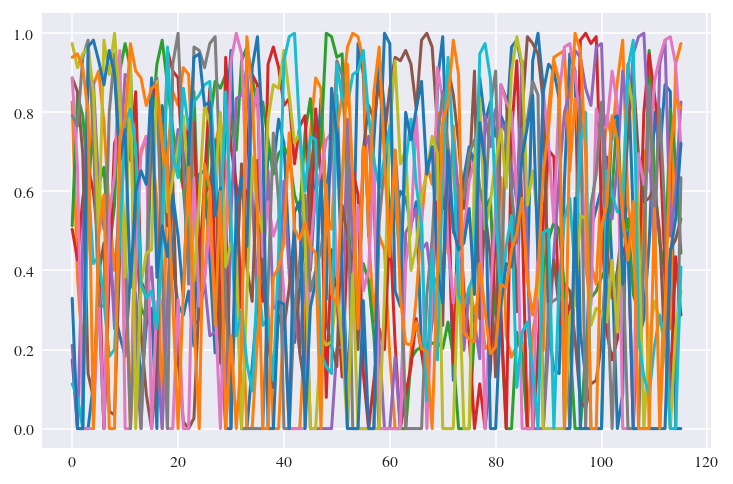

In [27]:
plt.plot(quantile_transform(b, n_quantiles=2))

In [68]:

def unit_vector(v, order=2):
    """
    Scale input vectors individually to unit norm (vector length = 1)
    The most commonly encountered vector norm is the L2-norm
    (sometimes called the magnitude of a vector)

     The unit vector obtained by normalizing the normal vector
     (i.e., dividing a nonzero normal vector by its vector norm)
      is the unit normal vector, often known simply as the "unit normal."

      Care should be taken to not confuse the terms "vector norm" (length of vector),
     "normal vector" (perpendicular vector) and "normalized v" (unit-length vector).

    """
    vector_norm = np.linalg.norm(v, ord=order)  # L2-Norm
    if vector_norm == 0:
        return v
    return v / vector_norm

In [ ]:
# TAL VEZ UTILES EN OTRO MOMENTO... a
chroma = librosa.logamplitude(chroma, ref=np.max)
#nnls = librosa.logamplitude(nnls, ref=np.max)

In [ ]:
cqthe = np.power(chroma, 10)
binarize(chroma, 0.1)
# to remove passing notes and other possible short artifacts
cqthef = np.minimum(cqthe, librosa.decompose.nn_filter(cqthe, aggregate=np.median, metric='cosine'))

# Local discontinuities and transients can be suppressed by using a horizontal median filter:
cqthefs = scipy.ndimage.median_filter(cqthef, size=(1, 9))

# we could binarize it... or not.
# cqthef = binarize(cqthe, 0.2)



In [66]:
def unit_vector(v, order=2):
    """
    Scale input vectors individually to unit norm (vector length = 1)
    The most commonly encountered vector norm is the L2-norm
    (sometimes called the magnitude of a vector)

     The unit vector obtained by normalizing the normal vector
     (i.e., dividing a nonzero normal vector by its vector norm)
      is the unit normal vector, often known simply as the "unit normal."

      Care should be taken to not confuse the terms "vector norm" (length of vector),
     "normal vector" (perpendicular vector) and "normalized v" (unit-length vector).

    """
    vector_norm = np.linalg.norm(v, order=order)  # L2-Norm
    if vector_norm == 0:
        return v
    return v / vector_norm

In [ ]:
def find_mode_flat(mode_array):

    from vector import distance

    modes = {'ionian':     np.array([1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.]),
             'dorian':     np.array([1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.]),
             'phrygian':   np.array([1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.]),
             'lydian':     np.array([1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.]),
             'mixolydian': np.array([1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.]),
             'aeolian':    np.array([1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.]),
             'harmonic':   np.array([1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.]),
             'locrian':    np.array([1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.]),
             'pentamaj':   np.array([1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.]),
             'pentamin':   np.array([1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.])}

    rank = []
    for mode in modes.keys():
        dis = distance(modes[mode], mode_array, dist='cityblock')
        rank.append((dis,mode))
    rank.sort(key=lambda tup: tup[0])
    return rank


In [ ]:
    modes = {'ionian':     np.array([1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.]),
             'dorian':     np.array([1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.]),
             'phrygian':   np.array([1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.]),
             'lydian':     np.array([1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.]),
             'mixolydian': np.array([1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.]),
             'aeolian':    np.array([1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.]),
             'harmonic':   np.array([1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.]),
             'locrian':    np.array([1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.]),
             'pentamaj':   np.array([1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.]),
             'pentamin':   np.array([1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.])}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()